In [22]:
import pandas as pd 
import torch

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis =1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32, stratify=y)

In [24]:
import torch.nn as nn
import torch.nn.functional as F #functional has the activation functions

#create tensors from our data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[7.0000e+00, 1.3300e+02, 8.4000e+01,  ..., 4.0200e+01, 6.9600e-01,
         3.7000e+01],
        [1.0000e+00, 1.6400e+02, 8.2000e+01,  ..., 3.2800e+01, 3.4100e-01,
         5.0000e+01],
        [2.0000e+00, 1.2700e+02, 5.8000e+01,  ..., 2.7700e+01, 1.6000e+00,
         2.5000e+01],
        ...,
        [0.0000e+00, 1.1900e+02, 0.0000e+00,  ..., 3.2400e+01, 1.4100e-01,
         2.4000e+01],
        [1.0000e+00, 1.0300e+02, 3.0000e+01,  ..., 4.3300e+01, 1.8300e-01,
         3.3000e+01],
        [6.0000e+00, 1.4400e+02, 7.2000e+01,  ..., 3.3900e+01, 2.5500e-01,
         4.0000e+01]])


In [25]:
#artificial neural network
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() #super is a computed indirected reference
        # what that means is that it isolates changes and makes 
        # sure the children in the layers of multiple inheritnce are calling
        # the right parents
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [26]:
torch.manual_seed(32)

#create an instance of the model
ann = ANN_Model()

In [27]:
# loss function
loss_function = nn.CrossEntropyLoss()

# It perfomed worse than the adam model
optimizer = torch.optim.SGD(ann.parameters(), lr=0.01, momentum=0.9)


In [28]:
#run model through various epochs/iterations
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() #minimize the loss function using backward propagation
    optimizer.step() #perform one optimization step each function

Epoch number: 1 with loss: 5.023974895477295
Epoch number: 11 with loss: 0.656520664691925
Epoch number: 21 with loss: 0.6443153619766235
Epoch number: 31 with loss: 0.6303593516349792
Epoch number: 41 with loss: 0.6083580255508423
Epoch number: 51 with loss: 0.603542685508728
Epoch number: 61 with loss: 0.5998169779777527
Epoch number: 71 with loss: 0.595834493637085
Epoch number: 81 with loss: 0.5929118394851685
Epoch number: 91 with loss: 0.59038245677948
Epoch number: 101 with loss: 0.5879860520362854
Epoch number: 111 with loss: 0.5856685638427734
Epoch number: 121 with loss: 0.5834570527076721
Epoch number: 131 with loss: 0.5811476707458496
Epoch number: 141 with loss: 0.5788889527320862
Epoch number: 151 with loss: 0.5766414403915405
Epoch number: 161 with loss: 0.5744499564170837
Epoch number: 171 with loss: 0.5720722675323486
Epoch number: 181 with loss: 0.5699468851089478
Epoch number: 191 with loss: 0.5680896639823914
Epoch number: 201 with loss: 0.566378116607666
Epoch numb

In [29]:
# predictions
y_pred = []

with torch.no_grad(): #decreases memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) #returns index with the max
        # element in each position set

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (156).

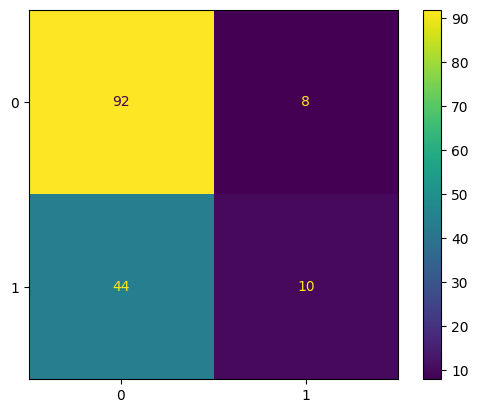

In [30]:


from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)